# Data preprocessing

Importing necessary libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Statistics

In [59]:
df = pd.read_csv('water_potability.csv')

In [60]:
df.head()

ph     Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.8904555  20791.31898     7.300212  368.516441   
1  3.716080075  129.4229205  18630.05786     6.635246         NaN   
2  8.099124189  224.2362594  19909.54173     9.275884         NaN   
3  8.316765884  214.3733941  22018.41744     8.059332  356.886136   
4  9.092223456  181.1015092  17978.98634     6.546600  310.135738   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity Potability  
0    564.308654       10.379783        86.990970   2.963135         No  
1    592.885359       15.180013        56.329076   4.500656         No  
2    418.606213       16.868637        66.420093   3.055934         No  
3    363.266516       18.436525       100.341674   4.628771         No  
4    398.410813       11.558279        31.997993   4.075075         No

In [61]:
df.shape

(3290, 10)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2804 non-null   object 
 1   Hardness         3290 non-null   object 
 2   Solids           3290 non-null   float64
 3   Chloramines      3290 non-null   float64
 4   Sulfate          2508 non-null   float64
 5   Conductivity     3290 non-null   float64
 6   Organic_carbon   3290 non-null   float64
 7   Trihalomethanes  3128 non-null   float64
 8   Turbidity        3290 non-null   float64
 9   Potability       3290 non-null   object 
dtypes: float64(7), object(3)
memory usage: 257.2+ KB


In [63]:
df.describe()

Solids  Chloramines      Sulfate  Conductivity  Organic_carbon  \
count   3290.000000  3290.000000  2508.000000   3290.000000     3290.000000   
mean   22014.253576     7.123896   333.833161    426.012707       14.281864   
std     8760.029123     1.581444    41.358997     80.796741        3.308583   
min      320.942611     0.352000   129.000000    181.483754        2.200000   
25%    15663.523660     6.132235   307.743026    365.641745       12.065478   
50%    20955.049560     7.131070   333.082042    421.474794       14.216595   
75%    27335.562455     8.110323   359.935068    481.446065       16.551517   
max    61227.196010    13.127000   481.030642    753.342620       28.300000   

       Trihalomethanes    Turbidity  
count      3128.000000  3290.000000  
mean         66.382939     3.966884  
std          16.175881     0.780371  
min           0.738000     1.450000  
25%          55.831102     3.439653  
50%          66.610937     3.955122  
75%          77.324282     4.500544  
max         124.000000     6.739000

In [64]:
df['Potability'].value_counts()

No     2009
Yes    1281
Name: Potability, dtype: int64

In [65]:
numeric_cols = df.columns.tolist()
numeric_cols = numeric_cols[:-1]
numeric_cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

## Check if data is valid

In [66]:
df[df['ph']=="No"]

ph    Hardness       Solids  Chloramines  Sulfate  Conductivity  \
3028  No  214.846144  49456.58711     7.897539      NaN    583.448849   

      Organic_carbon  Trihalomethanes  Turbidity Potability  
3028        7.702328        77.712891    4.92884         No

In [67]:
df=df[df['ph']!="No"]

In [68]:
df[df['ph']=="No"]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

In [69]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Removing special characters

In [70]:
def remove_underscore(df, column):
    df[column] = [str(s).replace('_', '') for s in df[column]]

In [71]:
remove_underscore(df, 'Hardness')

<ipython-input-70-cd6b0bc43855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = [str(s).replace('_', '') for s in df[column]]


In [72]:
remove_underscore(df, 'ph')

<ipython-input-70-cd6b0bc43855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = [str(s).replace('_', '') for s in df[column]]


## Change the data type of a column

In [73]:
def convert_dtype(df, column, dtype):
    df[column] = df[column].astype(dtype)

In [74]:
convert_dtype(df, 'Hardness', float)

<ipython-input-73-80145db3fa3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(dtype)


In [75]:
convert_dtype(df, 'ph', float)

<ipython-input-73-80145db3fa3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(dtype)


## Handling Missing Values

In [76]:
df.isnull().sum()

ph                 486
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [77]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)

<ipython-input-77-95e5146d25d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ph"].fillna(value = df["ph"].mean(), inplace = True)


In [78]:
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)

<ipython-input-78-0fb1313a3adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)


In [79]:
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

<ipython-input-79-84e513915799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)


In [80]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Removing duplicate data

In [81]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:", duplicates)

Duplicate Rows:             ph    Hardness       Solids  Chloramines     Sulfate  \
124   8.316766  214.373394  22018.41744     8.059332  356.886136   
125   9.092223  181.101509  17978.98634     6.546600  310.135738   
126   5.584087  188.313324  28748.68774     7.544869  326.678363   
127  10.223862  248.071735  28749.71654     7.513408  393.663395   
244   6.209642  195.417721  13116.70771     7.879348  333.833161   
246   9.918717  199.181251  21470.27831     6.799841  329.178429   
454   9.597192  167.088976  21153.32283     7.944469  346.075016   
455   6.964226  212.764494  29957.19122     7.675188  321.250898   
456   7.672910  152.878305  22989.35118     6.231913  343.439017   
649   6.624573  172.055471  14877.28974     7.079934  338.441277   
650   6.032189  200.420756  32882.15594     6.516519  352.018638   
651   6.344095  164.817207  14973.29736    10.707016  316.144450   

     Conductivity  Organic_carbon  Trihalomethanes  Turbidity Potability  
124    363.266516       

In [82]:
df = df.drop_duplicates()

In [83]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:", duplicates)

Duplicate Rows: Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


## Check if pH values are in the valid range (0 to 14)

In [84]:
df[(df['ph'] < 0) | (df['ph'] > 14)]

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
27   23.0  145.768181  13224.93564     7.906445  304.001993    298.990666   
68   21.0  211.200526  12830.48413     4.502117  326.961518    333.329848   
103  43.0  169.041918  36152.82090     8.330389  329.039710    590.748787   
161  32.0  190.779460  12224.31051     4.646211  308.564886    399.271359   
205  88.0  229.771350  16162.26231     4.933662  333.833161    448.846036   
245  21.0  232.075177  27159.38435     7.884991  350.445293    465.413775   
247  56.0  300.292476  12652.36298     6.655126  398.647786    487.459131   
248  77.0  265.061216  15156.78983     4.271545  333.334469    503.170615   
249  23.0  187.315048  20418.88993     7.214896  325.228881    351.186081   

     Organic_carbon  Trihalomethanes  Turbidity Potability  
27        12.729525        49.536849   4.004871         No  
68        16.045148        49.898406   3.439740         No  
103       17.695114       103.150463   3.995974         No  
161       11.876797        61.886636   3.463173         No  
205        8.816487        66.379316   4.600928         No  
245       13.863965        64.812257   4.916579         No  
247        9.347634        67.919789   5.002467         No  
248       11.286410        99.016003   4.034349         No  
249       16.800400        68.485480   4.033774         No

In [85]:
df = df[(df['ph'] > 0) & (df['ph'] < 14)]

In [86]:
df[(df['ph'] < 0) | (df['ph'] > 14)]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

In [87]:
print(df['ph'].min())
print(df['ph'].max())

0.22749905
13.54124024


## Outlier Detection

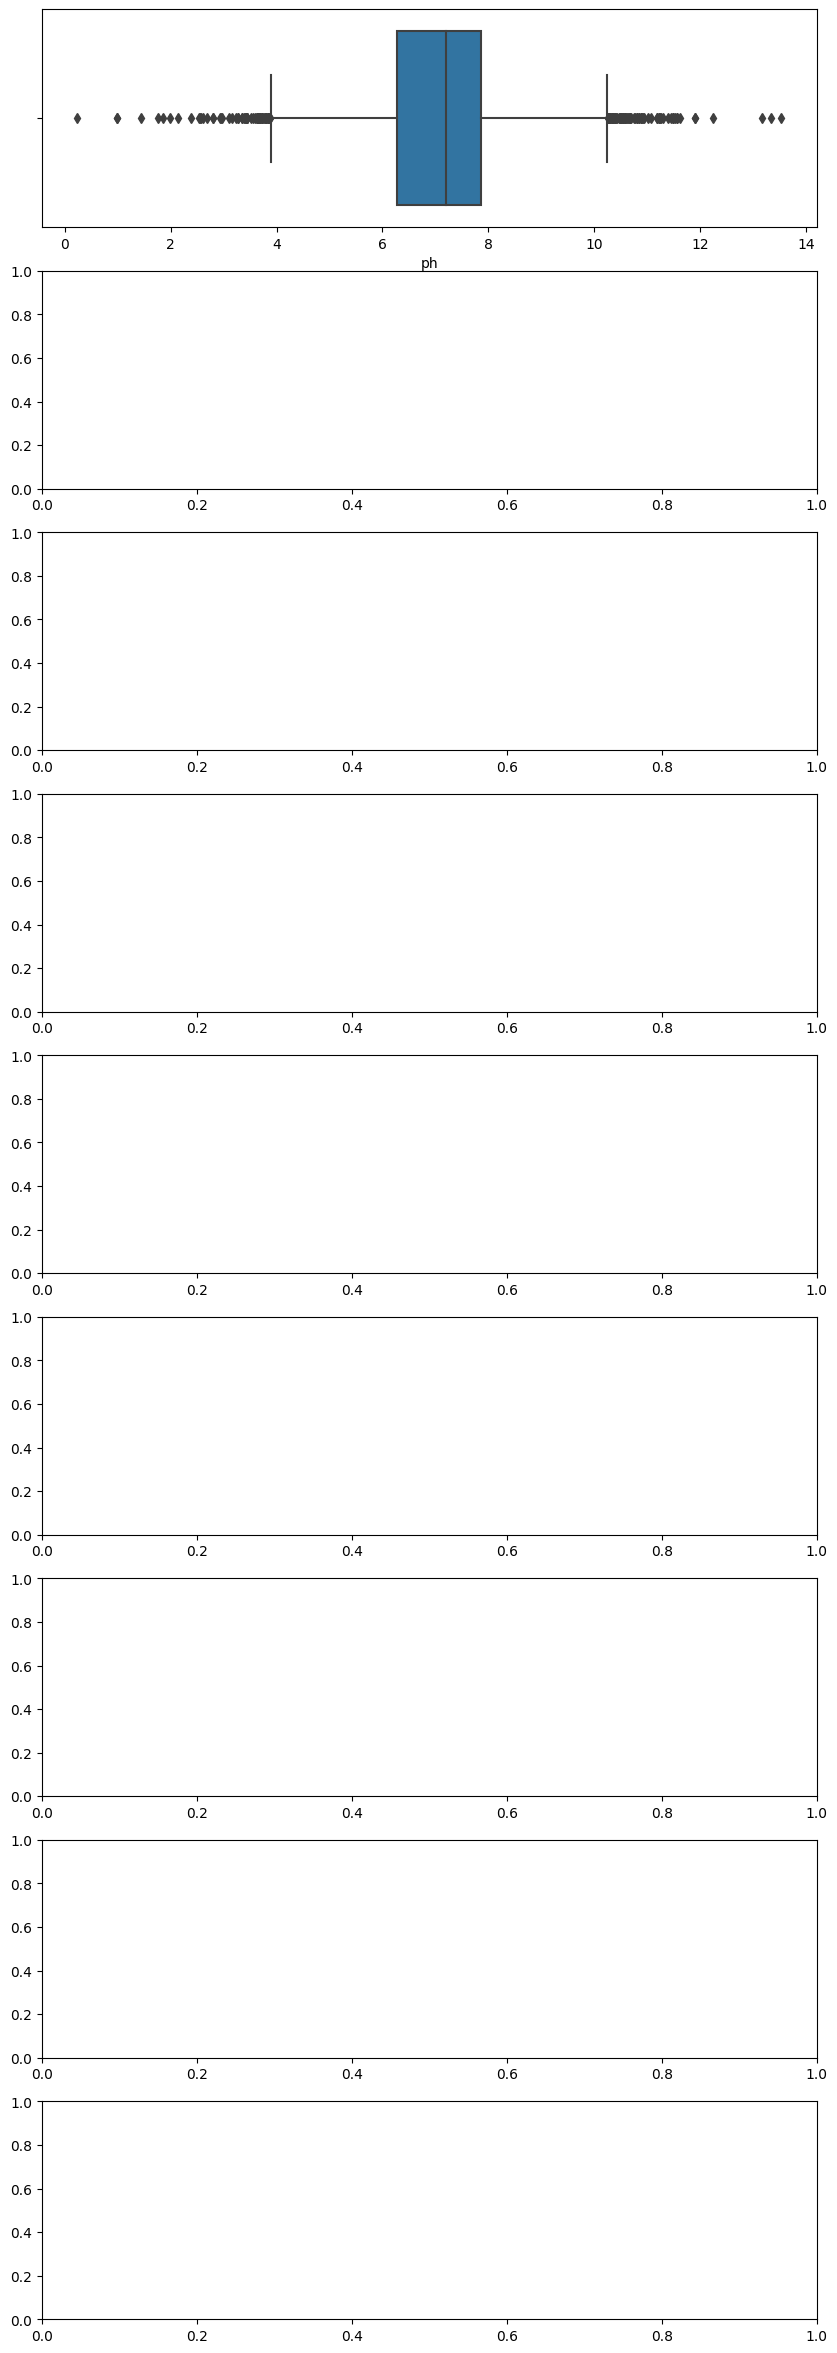

In [88]:
# Box plot each numeric columns to detect outliers
fig, ax = plt.subplots(len(numeric_cols),1, figsize=(10,30))
for i, c in enumerate(numeric_cols):
  sns.boxplot(x = df[c], ax = ax[i])
  plt.show()

In [89]:
def remove_outliers(c, df, debug = True):
  q1 = df[c].quantile(0.25)
  q3 = df[c].quantile(0.75)

  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  prev = df.shape[0]


  new_df = df.loc[df[c].between(lower, upper)]
  outliers_count = prev - new_df.shape[0]
  return new_df, outliers_count


for c in numeric_cols:
  df, count = remove_outliers(c, df)
  print(f'Detect and removed outliers {count} for column = {c}')

Detect and removed outliers 140 for column = ph
Detect and removed outliers 75 for column = Hardness
Detect and removed outliers 41 for column = Solids
Detect and removed outliers 53 for column = Chloramines
Detect and removed outliers 229 for column = Sulfate
Detect and removed outliers 7 for column = Conductivity
Detect and removed outliers 16 for column = Organic_carbon
Detect and removed outliers 42 for column = Trihalomethanes
Detect and removed outliers 18 for column = Turbidity


## Normalization

In [90]:
def normalize(column):
  min = column.min()
  max = column.max()
  normalized_column = (column - min) / (max - min)
  return normalized_column

In [91]:
for col in numeric_cols:
  df[col] = normalize(df[col])

In [92]:
df.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.519144  0.551219  0.464652     0.523249  0.762536      0.804335   
2  0.660854  0.675358  0.444637     0.777833  0.497718      0.481211   
3  0.695127  0.612070  0.492506     0.621069  0.673735      0.358484   
4  0.817239  0.398569  0.400816     0.426140  0.316780      0.436423   
5  0.264806  0.444846  0.645275     0.554776  0.443088      0.174862   

   Organic_carbon  Trihalomethanes  Turbidity Potability  
0        0.279439         0.748575   0.258967         No  
2        0.640827         0.493987   0.281003         No  
3        0.728149         0.913805   0.654492         No  
4        0.345074         0.067976   0.523011         No  
5        0.169162         0.351635   0.163169         No

## Format strings

In [93]:
df['Potability']

0        No
2        No
3        No
4        No
5        No
       ... 
3284    Yes
3286    Yes
3287    Yes
3288    Yes
3289    Yes
Name: Potability, Length: 2646, dtype: object

In [94]:
df['Potability'] = df['Potability'].str.lower()

In [95]:
df['Potability']

0        no
2        no
3        no
4        no
5        no
       ... 
3284    yes
3286    yes
3287    yes
3288    yes
3289    yes
Name: Potability, Length: 2646, dtype: object

## Encoding categorical data

In [96]:
df['Potability'] = df['Potability'].replace({'yes': 1, 'no': 0})
print(df['Potability'])

0       0
2       0
3       0
4       0
5       0
       ..
3284    1
3286    1
3287    1
3288    1
3289    1
Name: Potability, Length: 2646, dtype: int64


# Exploratory data analysis (EDA):

## Histogram

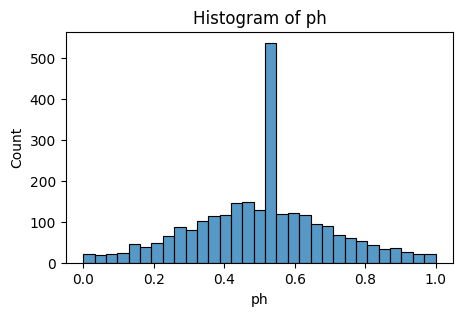

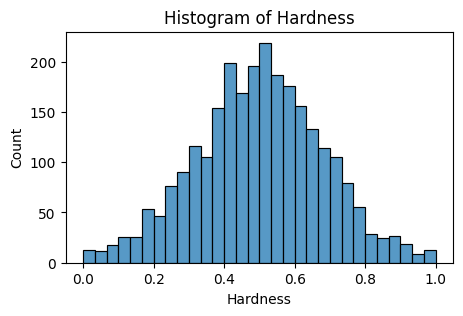

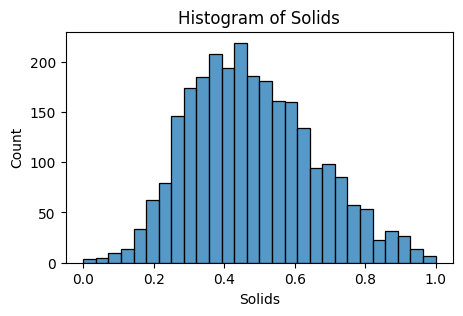

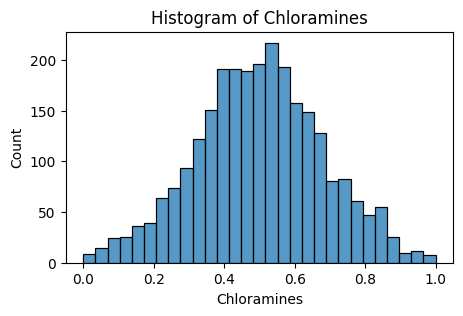

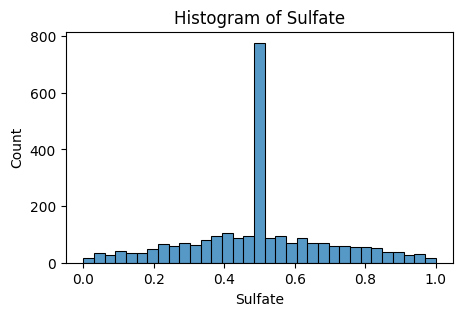

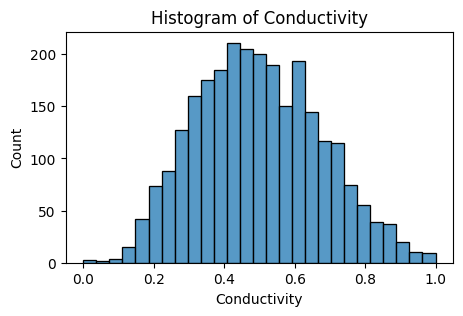

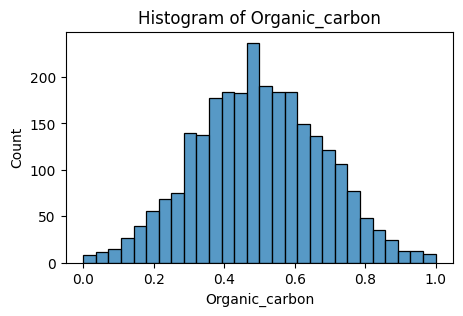

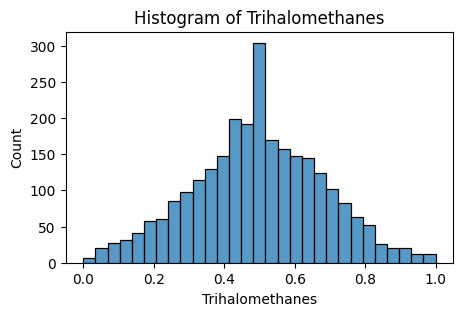

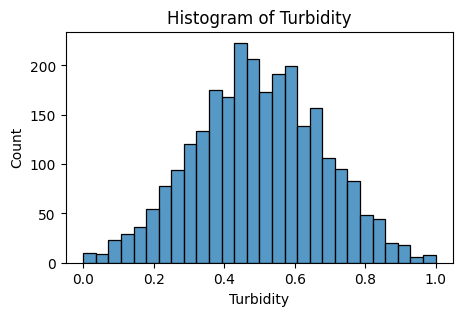

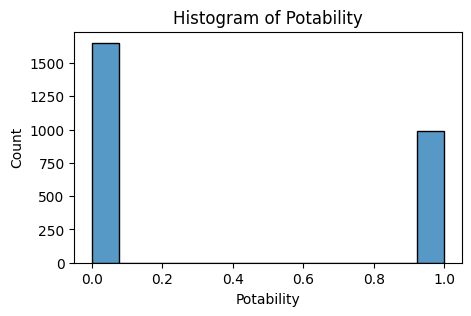

In [97]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        plt.figure(figsize=(5, 3))
        sns.histplot(df[i])
        plt.title(f'Histogram of {i}')
        plt.show()

## Pair Plot

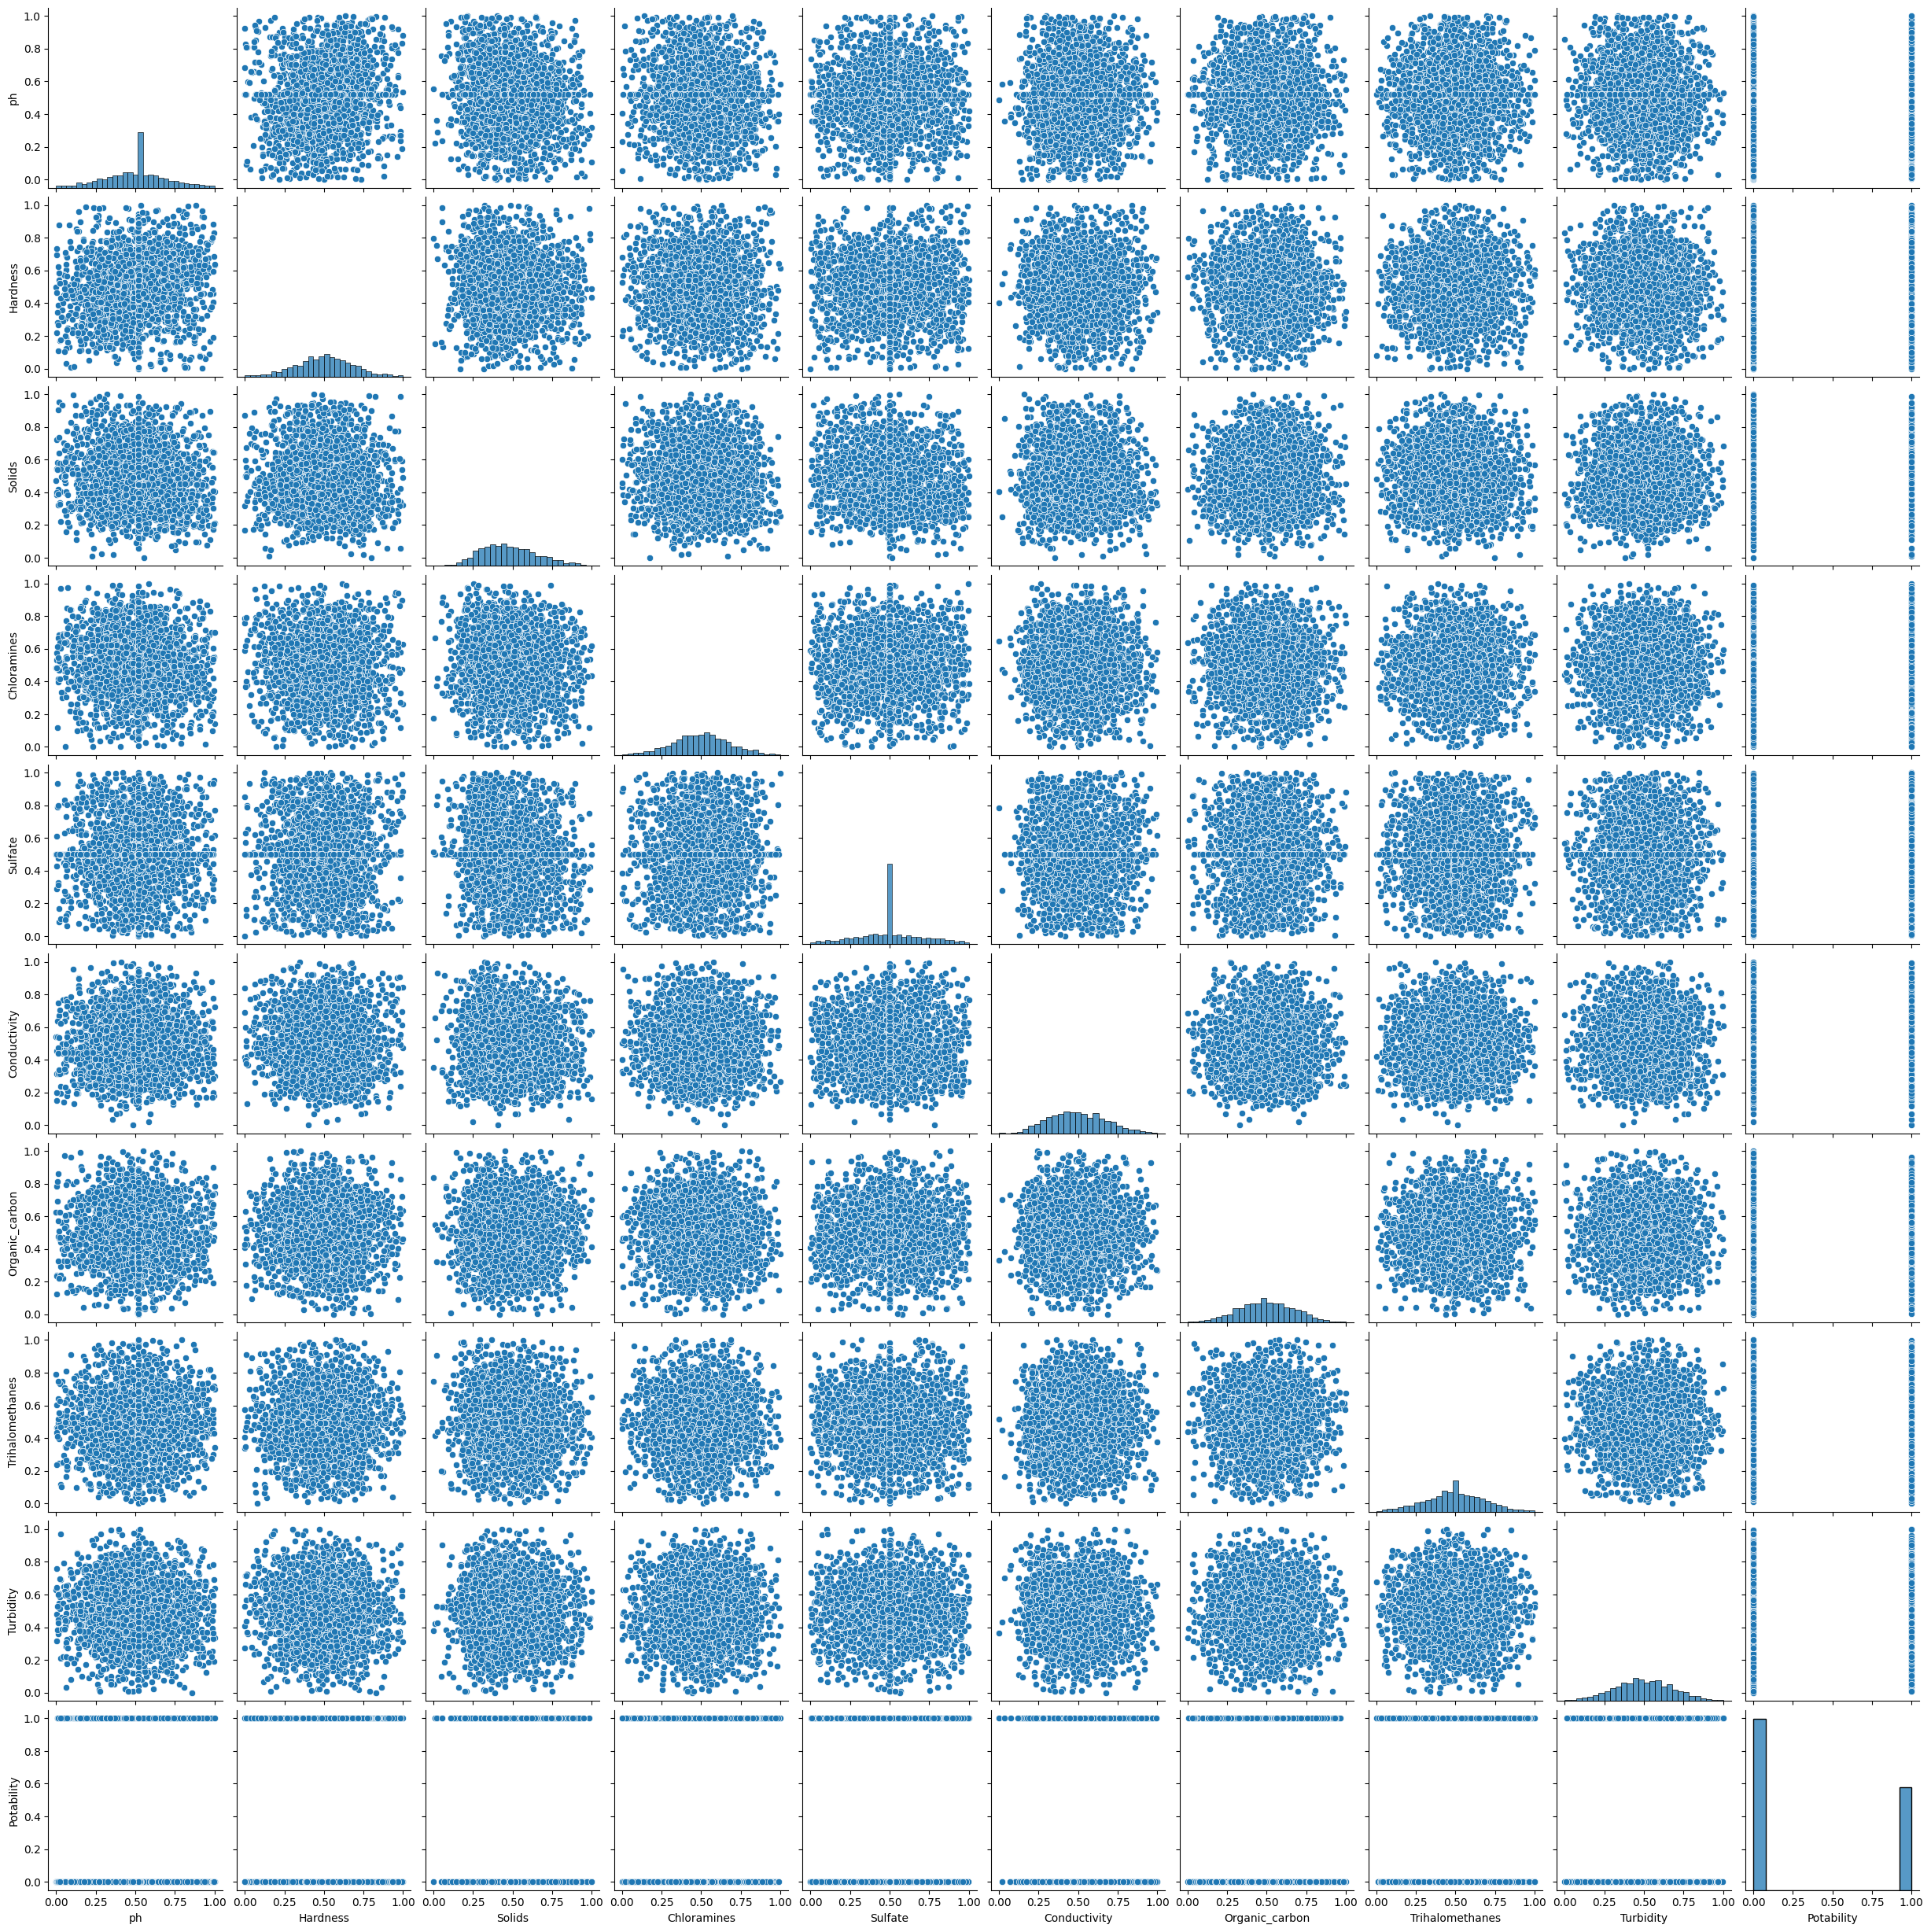

In [98]:
sns.pairplot(df)
plt.show()

In [99]:
num_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(num_columns)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


## Line Plot

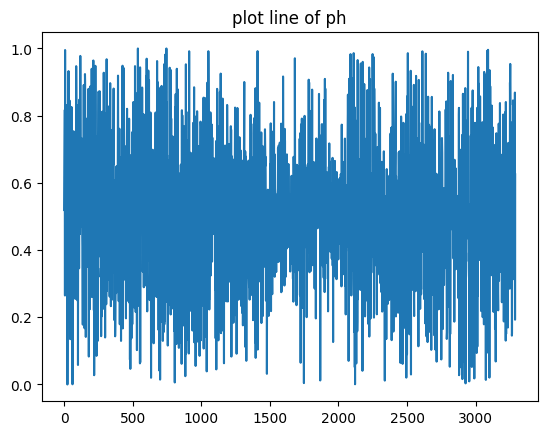

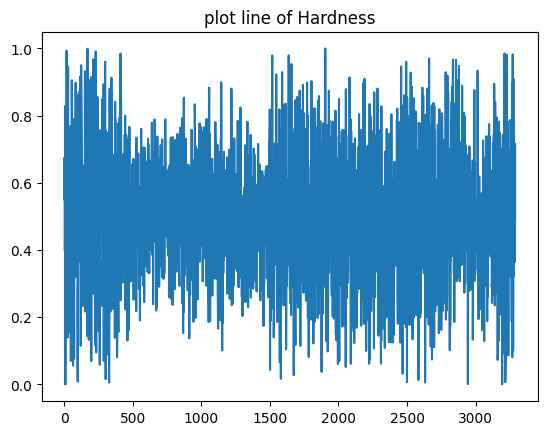

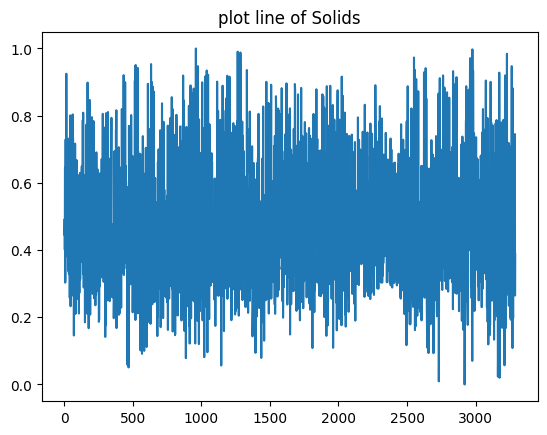

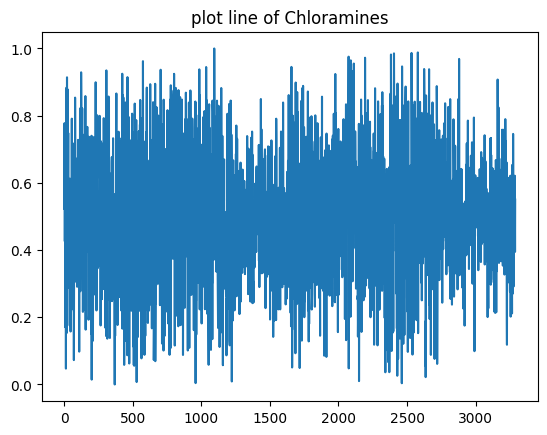

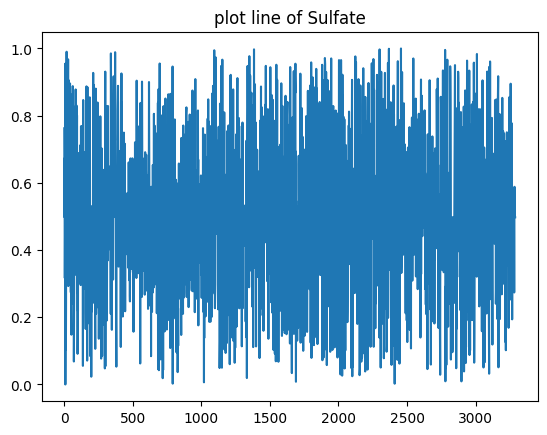

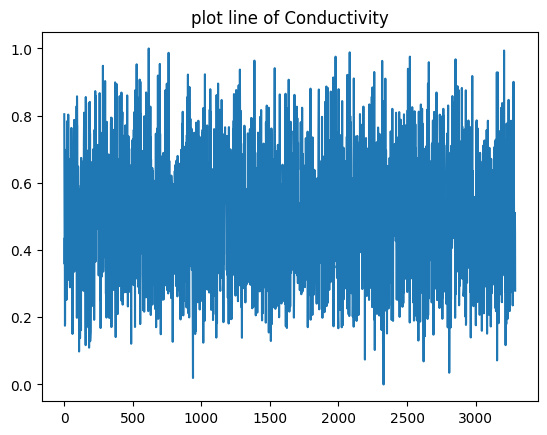

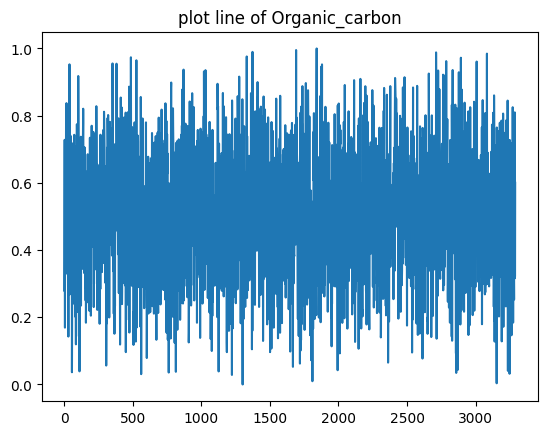

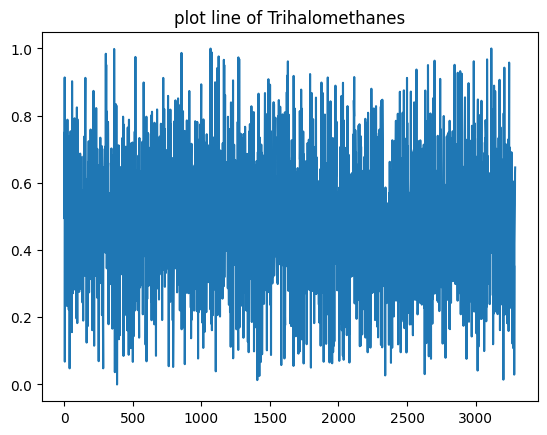

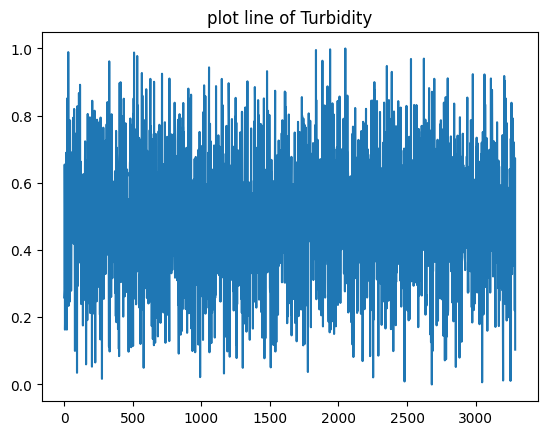

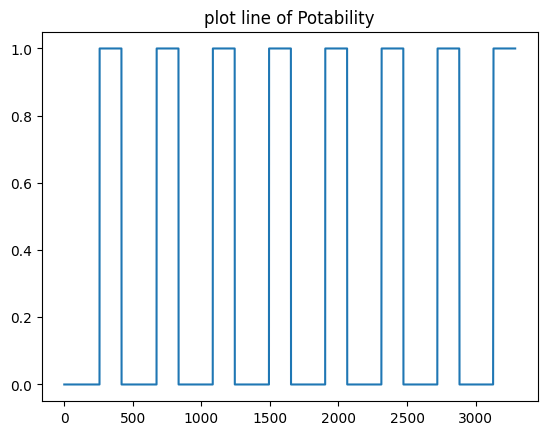

In [100]:
for i in df.columns:
        df[i].plot.line()
        plt.title(f'plot line of {i}')
        plt.show()

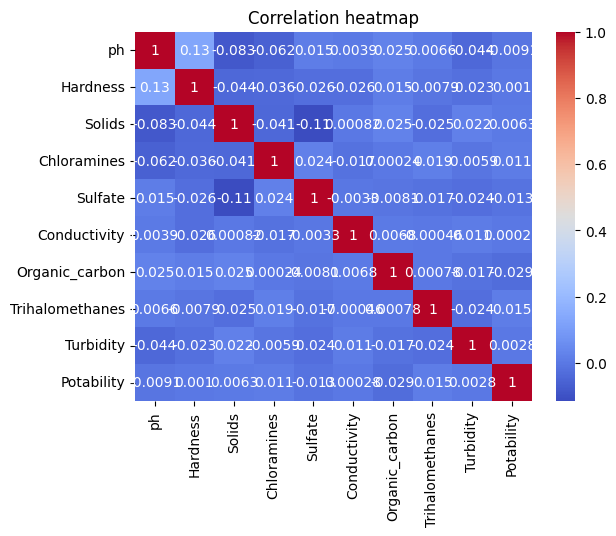

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.133298 -0.082731    -0.062328  0.015493   
Hardness         0.133298  1.000000 -0.044342    -0.036441 -0.025594   
Solids          -0.082731 -0.044342  1.000000    -0.040845 -0.114703   
Chloramines     -0.062328 -0.036441 -0.040845     1.000000  0.023754   
Sulfate          0.015493 -0.025594 -0.114703     0.023754  1.000000   
Conductivity     0.003894 -0.026434  0.000819    -0.017050 -0.003323   
Organic_carbon   0.025161  0.014561  0.024674     0.000240 -0.008137   
Trihalomethanes  0.006635 -0.007884 -0.025420     0.018954 -0.016752   
Turbidity       -0.044462 -0.023196  0.021901    -0.005887 -0.023586   
Potability      -0.009120  0.001050  0.006320     0.010938 -0.012743   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.003894        0.025161         0.006635  -0.044462   
Hardness            -0.026434        0.014561        

In [101]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()
print(df.corr())

In [102]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

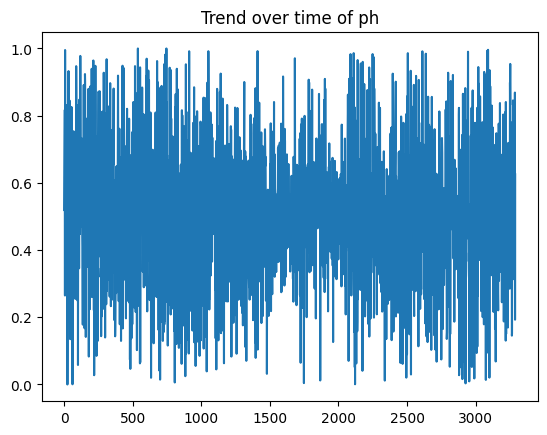

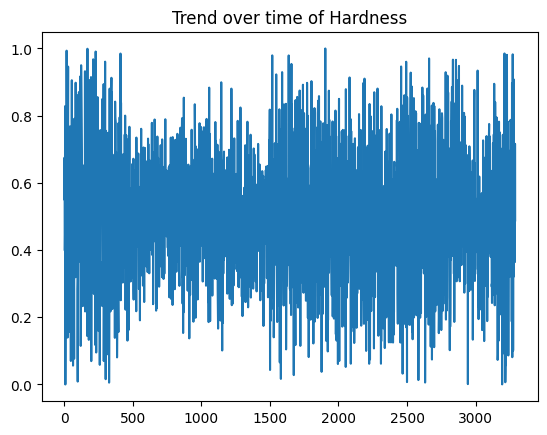

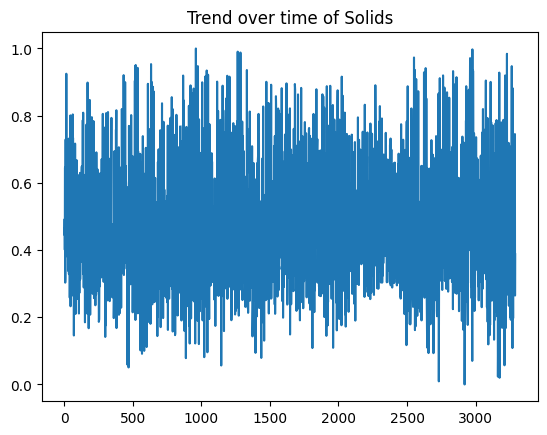

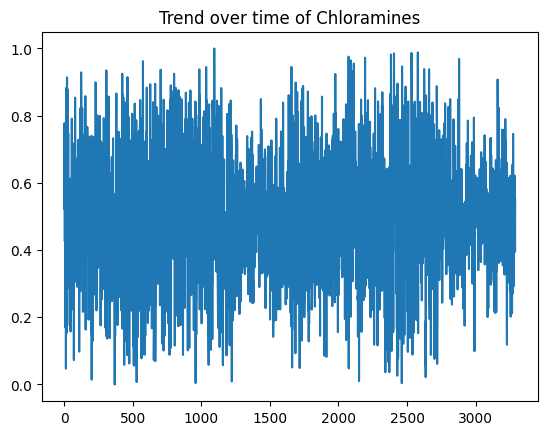

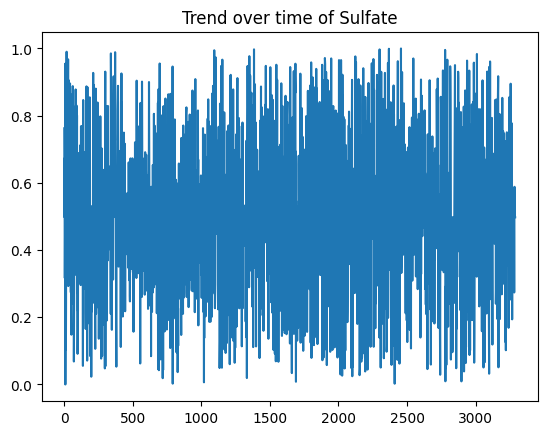

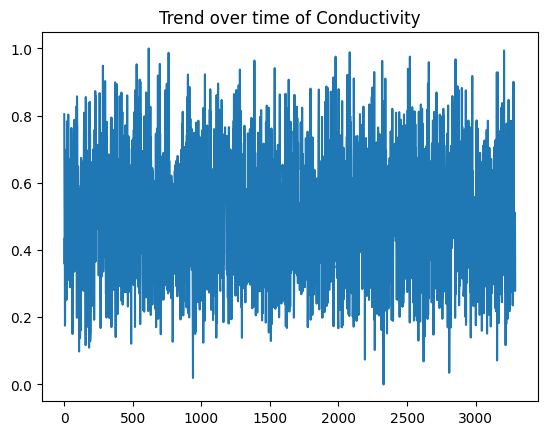

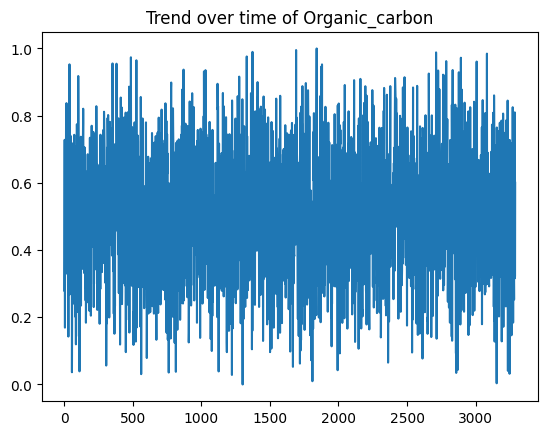

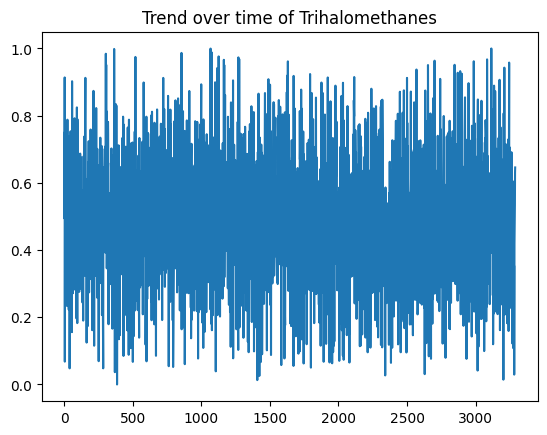

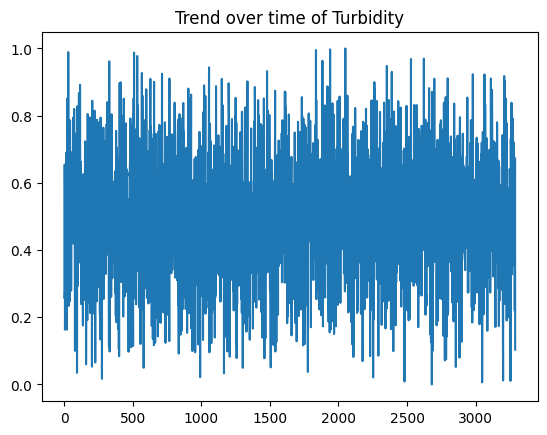

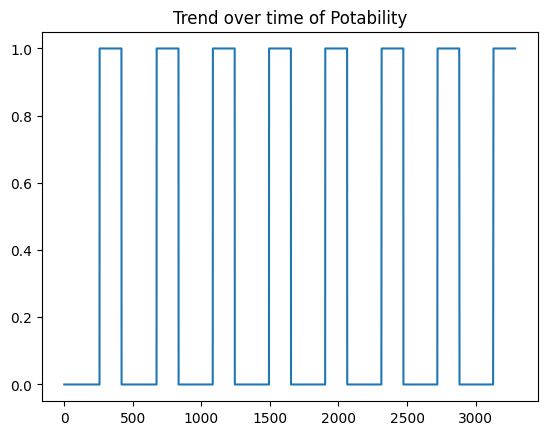

In [103]:
for i in df.columns:
    df[i].plot()
    plt.title(f'Trend over time of {i}')
    plt.show()


## Probability Plot

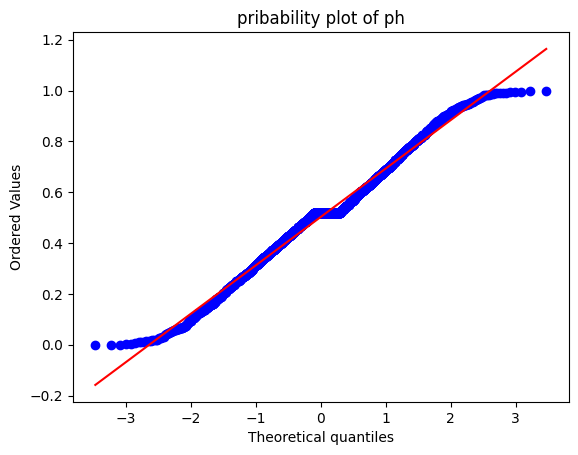

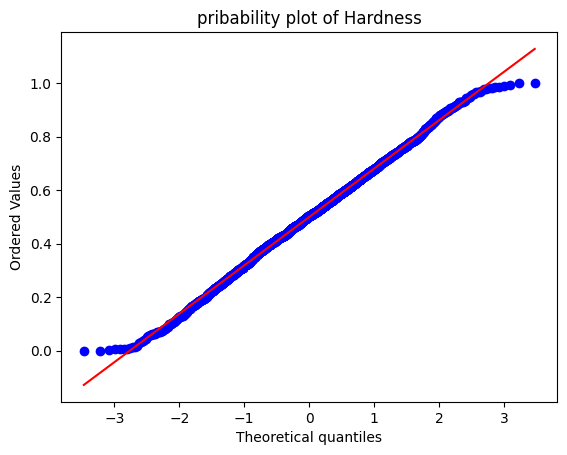

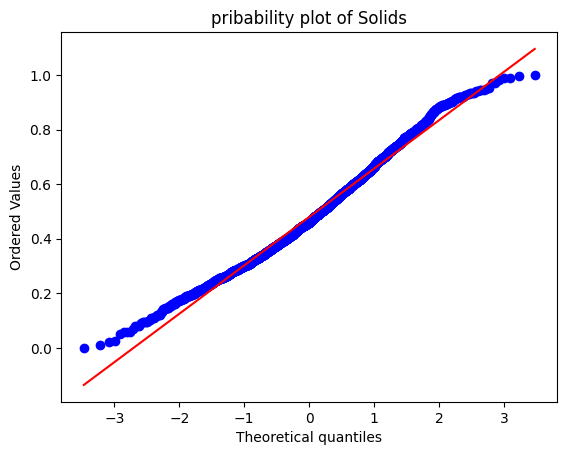

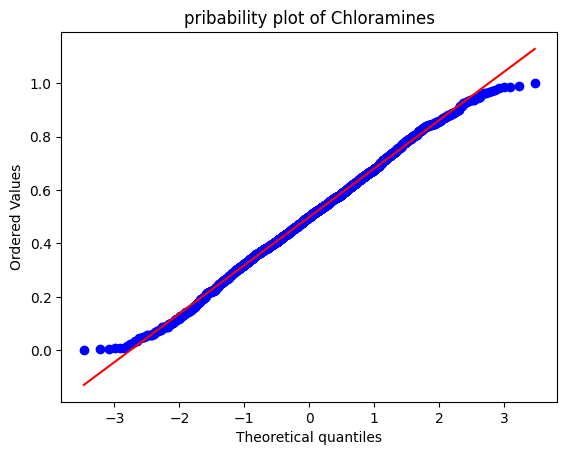

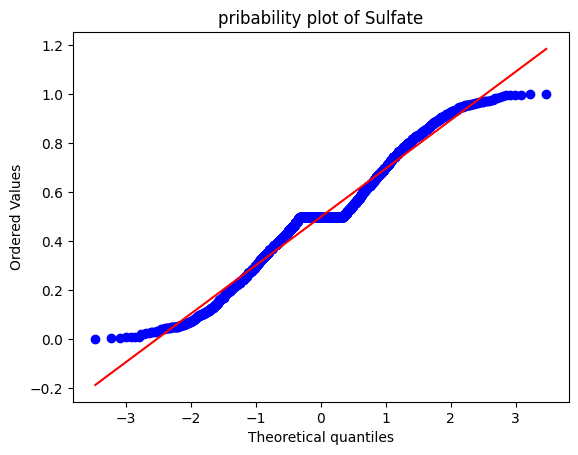

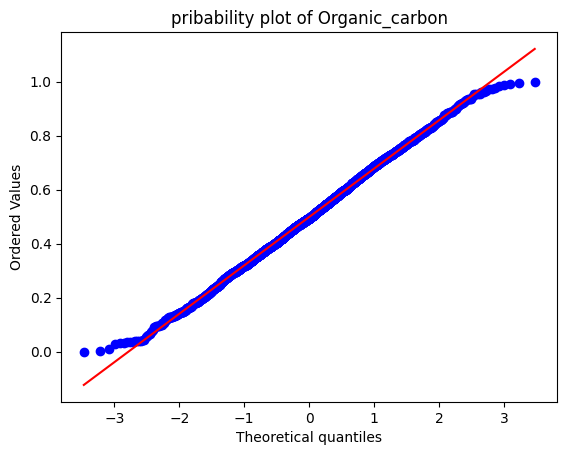

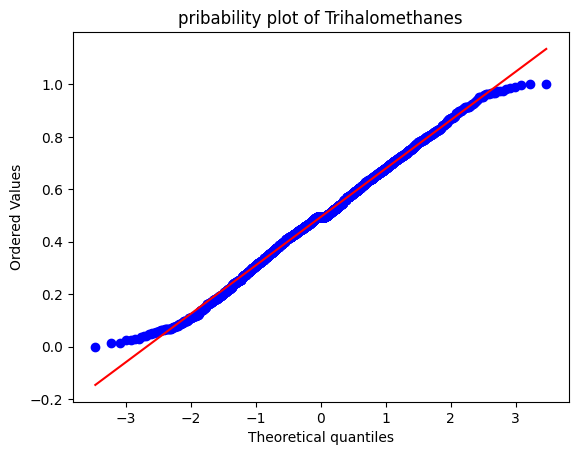

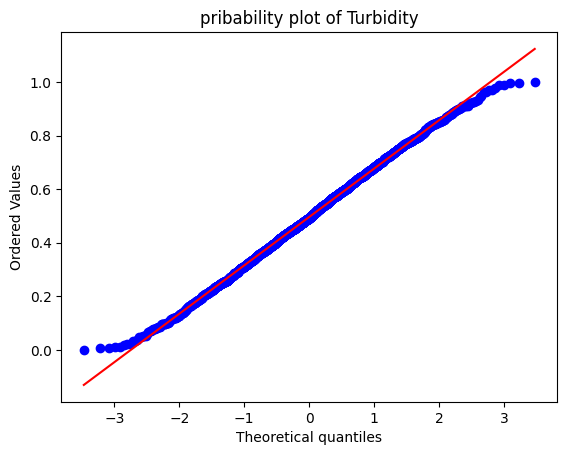

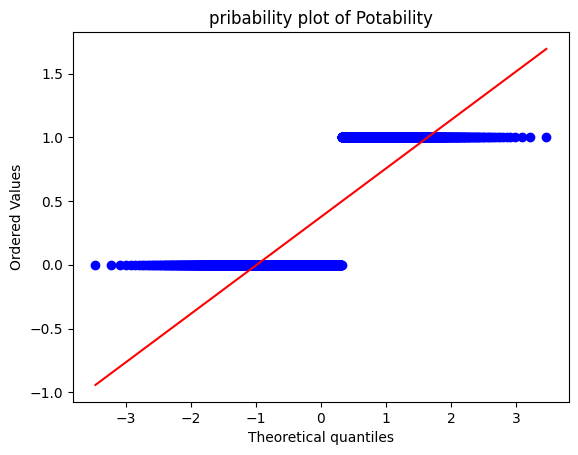

In [104]:
import scipy.stats as stats

for i in df.columns:
    stats.probplot(df[i], plot=plt)
    plt.title(f'pribability plot of {i}')
    plt.show()

## Box Plot

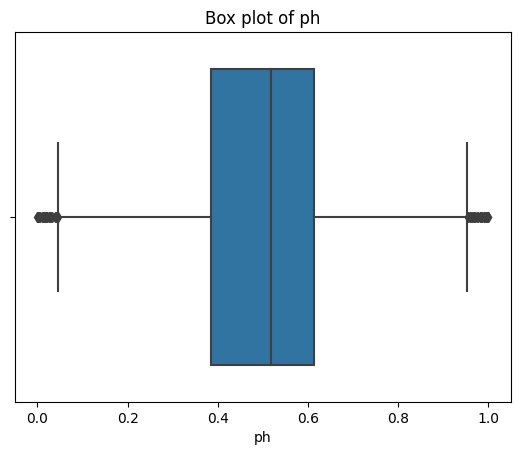

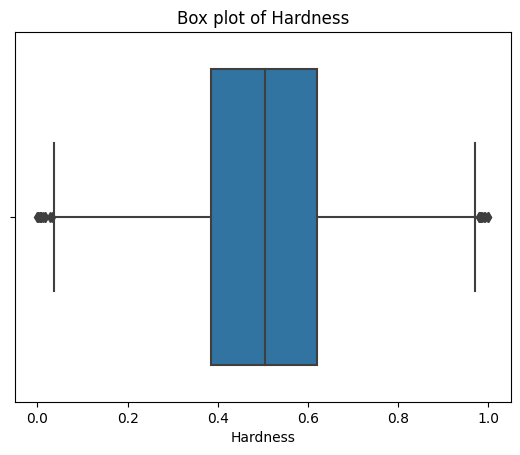

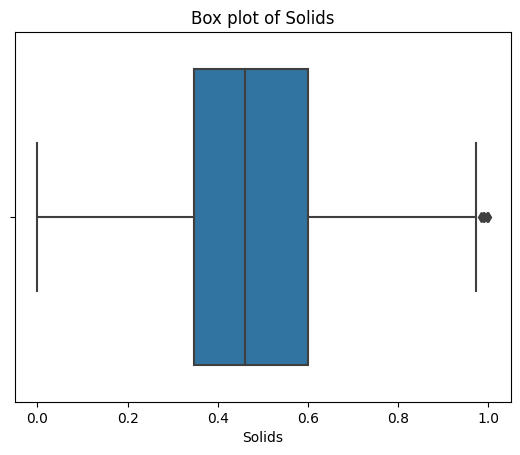

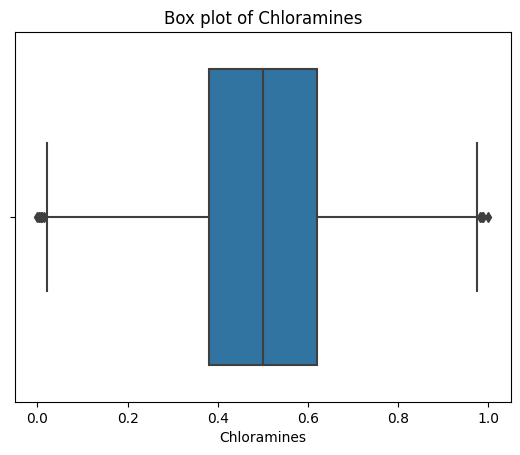

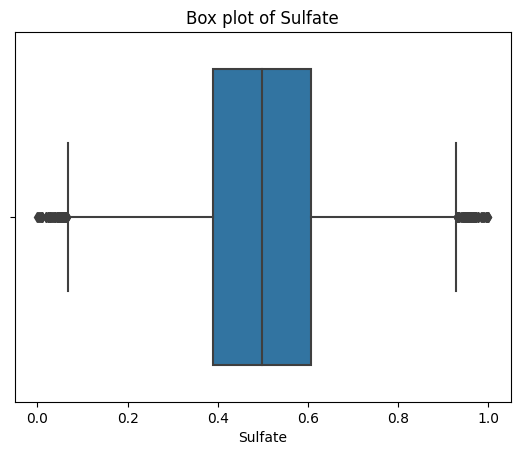

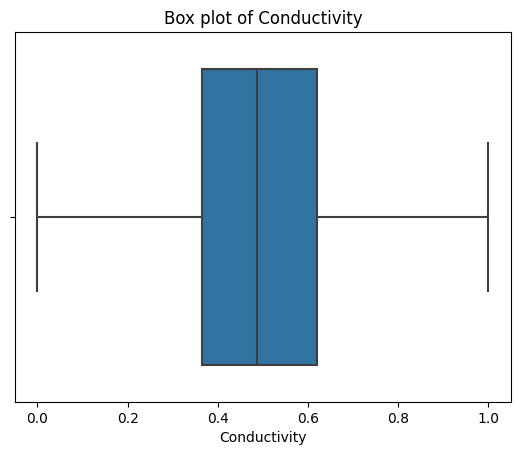

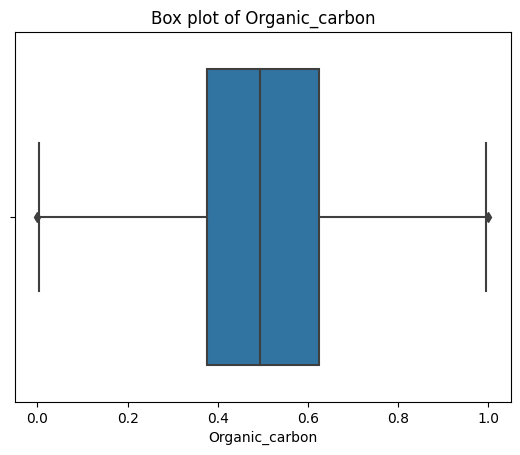

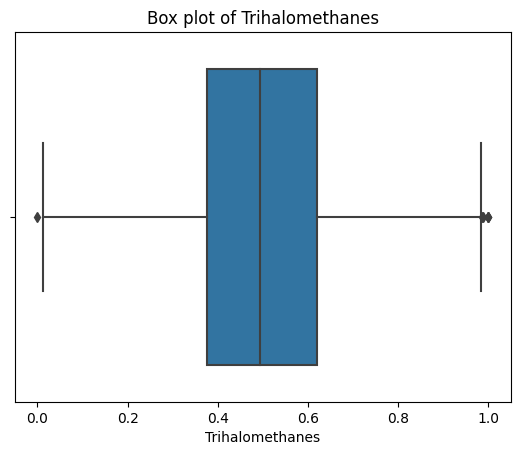

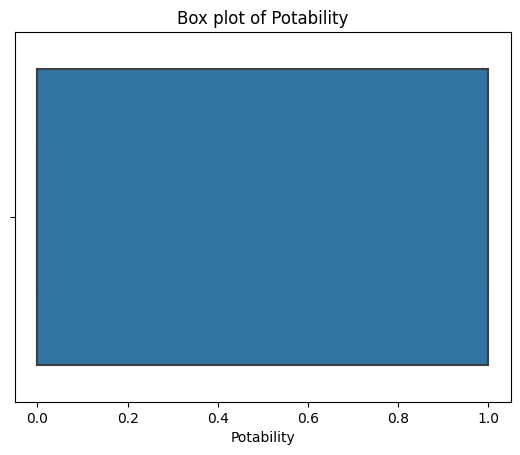

In [105]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title(f'Box plot of {i}')
    plt.show()

## Kernel Density Estimate Plot

<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


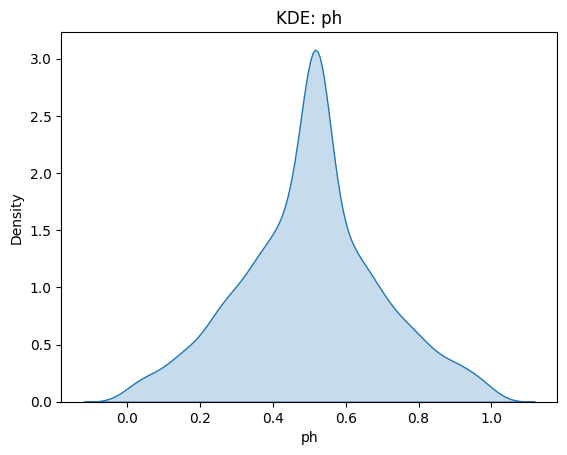

<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


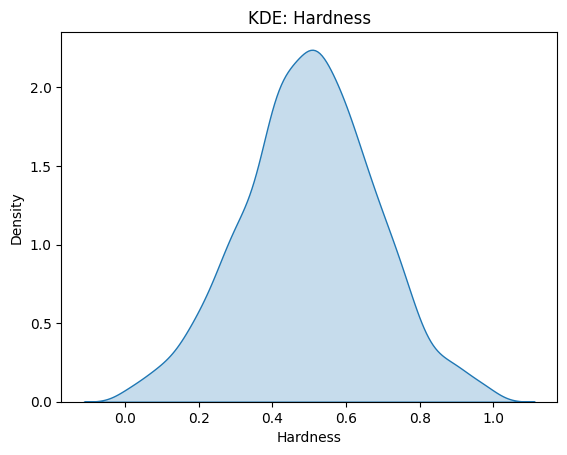

<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


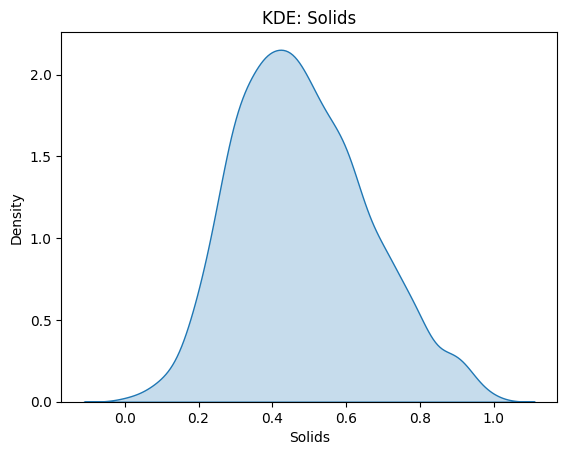

<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


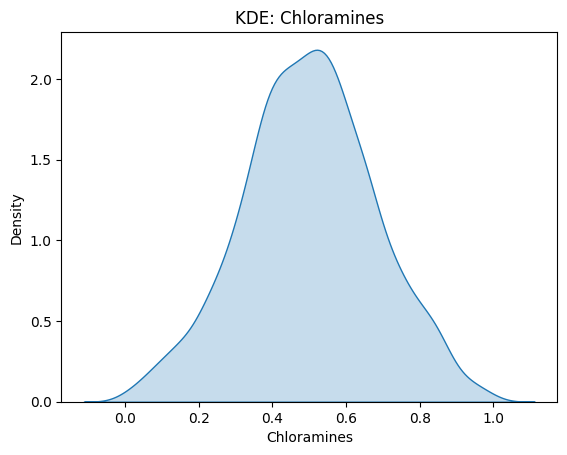

<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


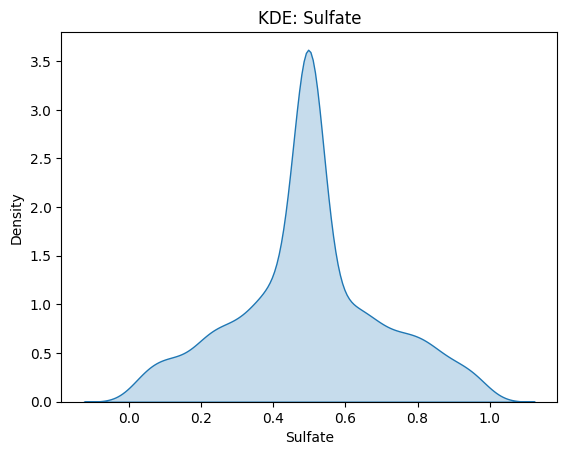

<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


<ipython-input-106-ba1da3a6a206>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[i], shade=True)


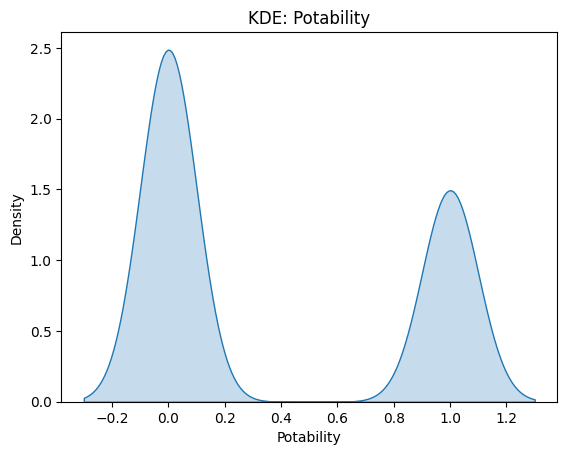

In [106]:
for i in df.columns:
    sns.kdeplot(df[i], shade=True)
    plt.title(f"KDE: {i}")
    plt.show()

## Statistics

In [107]:
df.describe()

ph     Hardness       Solids  Chloramines      Sulfate  \
count  2646.000000  2646.000000  2646.000000  2646.000000  2646.000000   
mean      0.502840     0.500179     0.480158     0.499387     0.498264   
std       0.191606     0.180977     0.178556     0.181335     0.200770   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.385890     0.385049     0.347294     0.380671     0.390282   
50%       0.519144     0.504044     0.460153     0.499684     0.497718   
75%       0.612789     0.620014     0.599465     0.620053     0.605761   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2646.000000     2646.000000      2646.000000  2646.000000  2646.000000  
mean       0.497081        0.498969         0.494591     0.496549     0.375283  
std        0.177162        0.179300         0.184837     0.180804     0.484288  
min        0.000000        0.000000         0.000000     0.000000     0.000000  
25%        0.363935        0.375017         0.376926     0.371999     0.000000  
50%        0.487093        0.494577         0.493483     0.492613     0.000000  
75%        0.620220        0.624675         0.620648     0.623274     1.000000  
max        1.000000        1.000000         1.000000     1.000000     1.000000

## Hypothesis Testing

In [108]:
from scipy.stats import ttest_1samp

for i in df.columns:
    t_stat, p_val = ttest_1samp(df[i], 50)  # Replace 'A' with the desired column name
    print(f"\nT-statistic of {i} :", t_stat)
    print(f"P-value of {i} :", p_val)


T-statistic of ph : -13288.1746182451
P-value of ph : 0.0

T-statistic of Hardness : -14069.379385168113
P-value of Hardness : 0.0

T-statistic of Solids : -14265.915332795026
P-value of Solids : 0.0

T-statistic of Chloramines : -14041.860644562195
P-value of Chloramines : 0.0

T-statistic of Sulfate : -12682.856805524561
P-value of Sulfate : 0.0

T-statistic of Conductivity : -14373.250436709857
P-value of Conductivity : 0.0

T-statistic of Organic_carbon : -14201.319632109768
P-value of Organic_carbon : 0.0

T-statistic of Trihalomethanes : -13777.13389055263
P-value of Trihalomethanes : 0.0

T-statistic of Turbidity : -14083.851750418911
P-value of Turbidity : 0.0

T-statistic of Potability : -5270.959340987437
P-value of Potability : 0.0


## Bar Plots

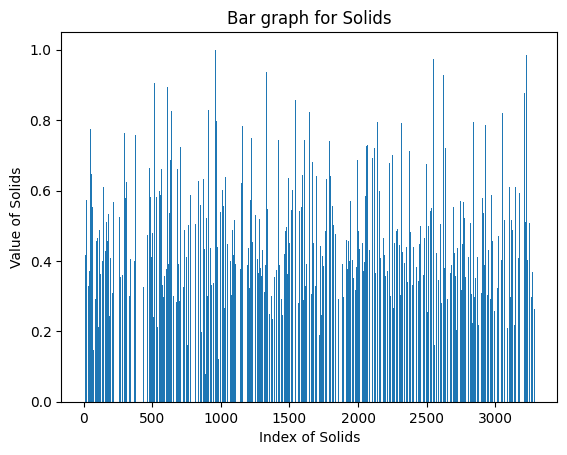

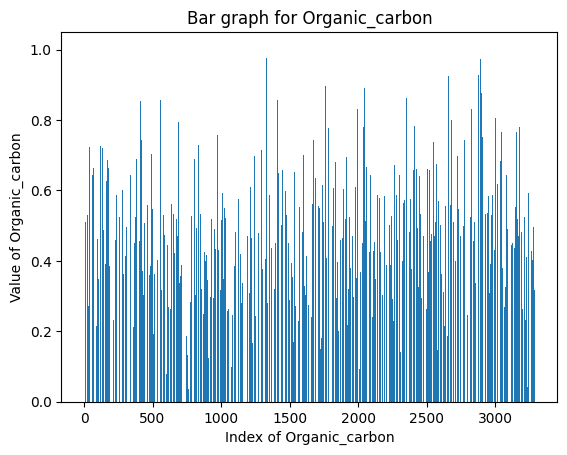

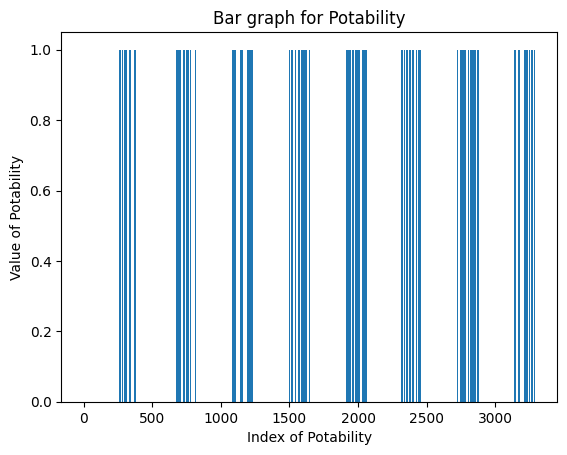

In [109]:
for i in df.columns:
    plt.bar(df.index, df[i])
    plt.xlabel(f'Index of {i}')
    plt.ylabel(f'Value of {i}')
    plt.title(f'Bar graph for {i}')
    plt.show()

## Pyramid-Plot

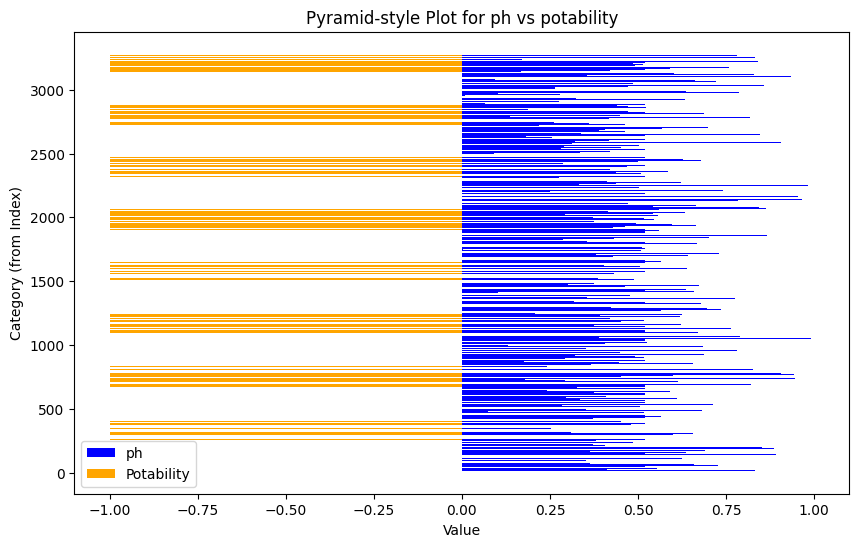

In [110]:
df['Potability'] = -df['Potability']

plt.figure(figsize=(10, 6))

plt.barh(df.index, df['ph'], color='blue', label='ph')
plt.barh(df.index, df['Potability'], color='orange', label='Potability')

plt.xlabel('Value')
plt.ylabel('Category (from Index)')
plt.title('Pyramid-style Plot for ph vs potability')
plt.legend()
plt.show()

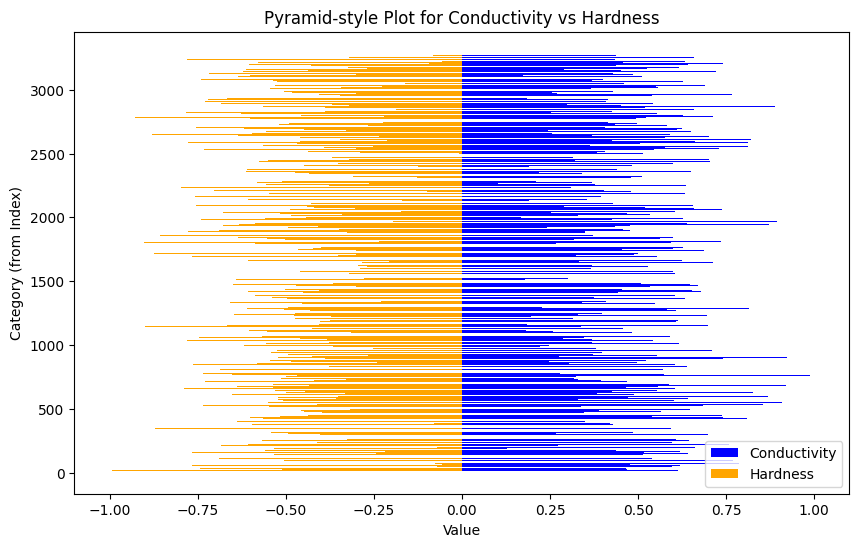

In [111]:
df['Hardness'] = -df['Hardness']

plt.figure(figsize=(10, 6))

plt.barh(df.index, df['Conductivity'], color='blue', label='Conductivity')
plt.barh(df.index, df['Hardness'], color='orange', label='Hardness')

plt.xlabel('Value')
plt.ylabel('Category (from Index)')
plt.title('Pyramid-style Plot for Conductivity vs Hardness')
plt.legend()
plt.show()

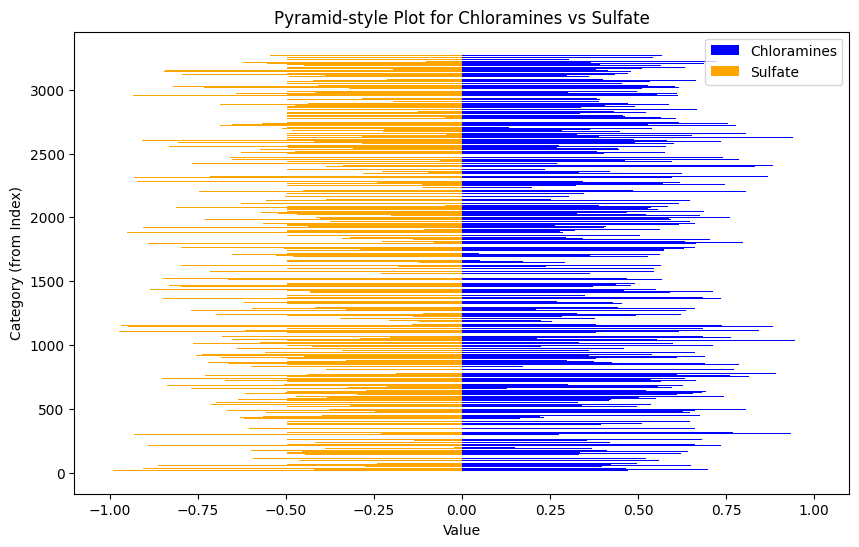

In [112]:
df['Sulfate'] = -df['Sulfate']

plt.figure(figsize=(10, 6))

plt.barh(df.index, df['Chloramines'], color='blue', label='Chloramines')
plt.barh(df.index, df['Sulfate'], color='orange', label='Sulfate')

plt.xlabel('Value')
plt.ylabel('Category (from Index)')
plt.title('Pyramid-style Plot for Chloramines vs Sulfate')
plt.legend()
plt.show()

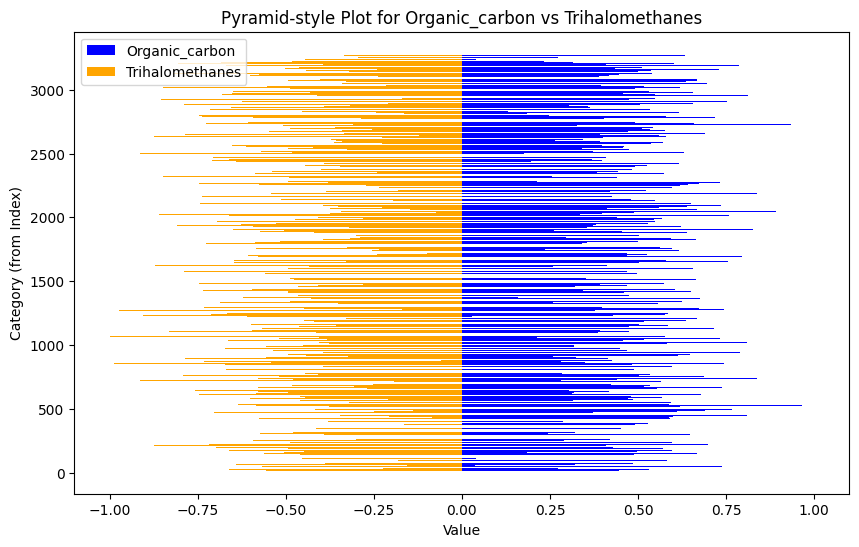

In [113]:
df['Trihalomethanes'] = -df['Trihalomethanes']

plt.figure(figsize=(10, 6))

plt.barh(df.index, df['Organic_carbon'], color='blue', label='Organic_carbon')
plt.barh(df.index, df['Trihalomethanes'], color='orange', label='Trihalomethanes')

plt.xlabel('Value')
plt.ylabel('Category (from Index)')
plt.title('Pyramid-style Plot for Organic_carbon vs Trihalomethanes')
plt.legend()
plt.show()

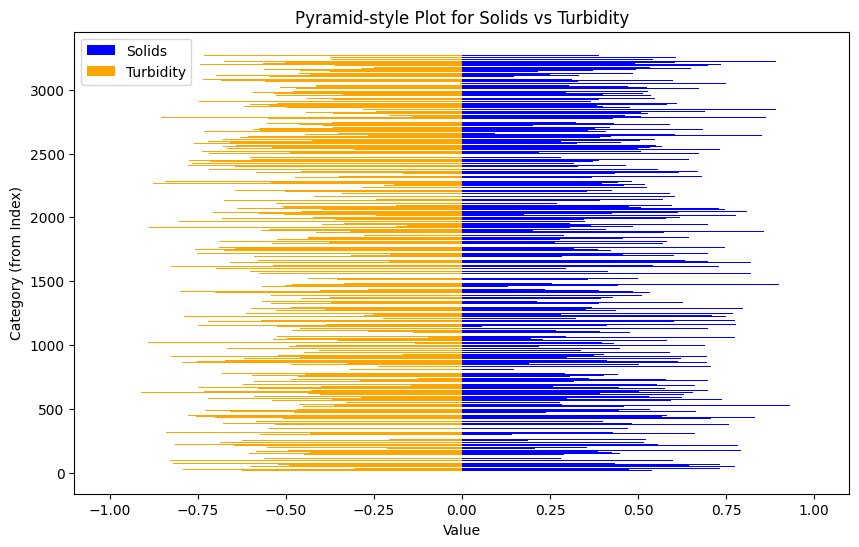

In [114]:
df['Turbidity'] = -df['Turbidity']

plt.figure(figsize=(10, 6))

plt.barh(df.index, df['Solids'], color='blue', label='Solids')
plt.barh(df.index, df['Turbidity'], color='orange', label='Turbidity')

plt.xlabel('Value')
plt.ylabel('Category (from Index)')
plt.title('Pyramid-style Plot for Solids vs Turbidity')
plt.legend()
plt.show()